<a href="https://colab.research.google.com/github/Devyanigangurde/AIML_Projects/blob/main/Max_Life_Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Max Life Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Devyani Hemraj Gangurde

# **Project Summary -**

Building a model to predict whether a customer would be interested in Vehicle Insurance. It's extremely helpful for the company because it can then accordingly plan its communication strategy out to those customers and optimise its business model and revenue. In Exploratory Data Analysis, I categorized the Age as YoungAge, MiddleAge, OldAge. Then I categorized Region_code and Policy_Sales_Channel to extract some valuable information from these features. I explored the independent features using some plots. Then the feature selection I used ExtraTreeClassifier and then the train test split. For Model prediction, I used supervised machine learning algorithm like logistic regression, Random forest classifier and XGB Classifier. Then comparing all models and seeing which model gives the best results.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

**Define Your Business Objective?**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_df = pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [4]:
# Dataset First Look
data_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
data_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"Number of rows: {len(data_df.axes[0])}")
print(f"Number of columns: {len(data_df.axes[1])}")

Number of rows: 381109
Number of columns: 12


### Dataset Information

In [8]:
# Dataset Info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
(data_df.duplicated()).value_counts()

,count
False,381109


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
data_df.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


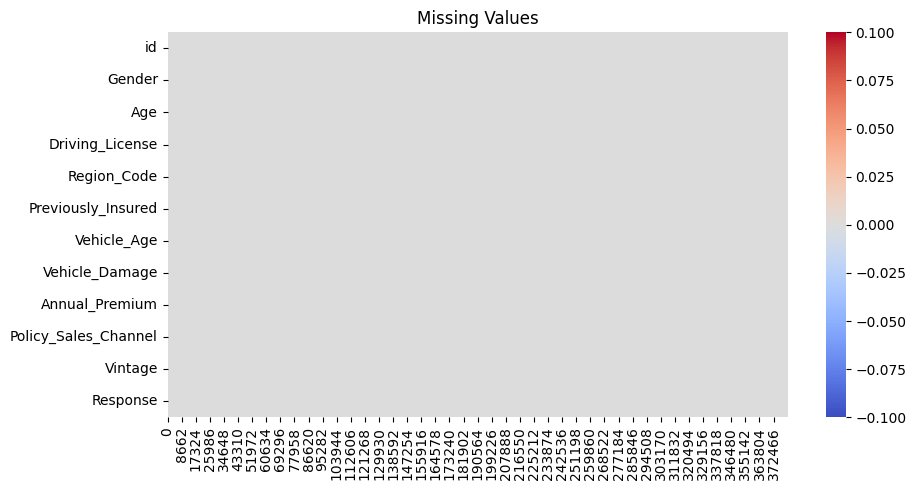

In [11]:
# Visualizing the missing values
plt.figure(figsize= (10,5))
sns.heatmap(data_df.isna().transpose(), cmap = 'coolwarm')
plt.title('Missing Values')
plt.show()

### What did you know about your dataset?


1.   As we can see, our data set contains 381109 rows and 12 columns.
2.   We do not have any Null Values in our dataset.
3.   We have 4 numeric and 5 categorical independent features.
4.   Our dependent feature is a categorical column (Response)





## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
data_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
# Dataset Describe
data_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description



1.   id : Unique ID for the customer
2.   Gender : Gender of the customer
3.   Age : Age of the customer
4.   Driving_License 0 : Customer does not have DL, 1 : Customer already has DL
5.   Region_Code : Unique code for the region of the customer
6.   Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
7.   Vehicle_Age : Age of the Vehicle
8.   Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
9.   Annual_Premium : The amount customer needs to pay as premium in the year
10.   PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11.   Vintage : Number of Days, Customer has been associated with the company
12.   Response : 1 : Customer is interested, 0 : Customer is not interested


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
pd.Series({col:data_df[col].nunique() for col in data_df})

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
df = data_df.copy()

### What all manipulations have you done and insights you found?

Copy of data set has been done so the original data doesn't get affected.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 plot of response(1 for yes, 0 for no)

<Axes: xlabel='Response', ylabel='count'>

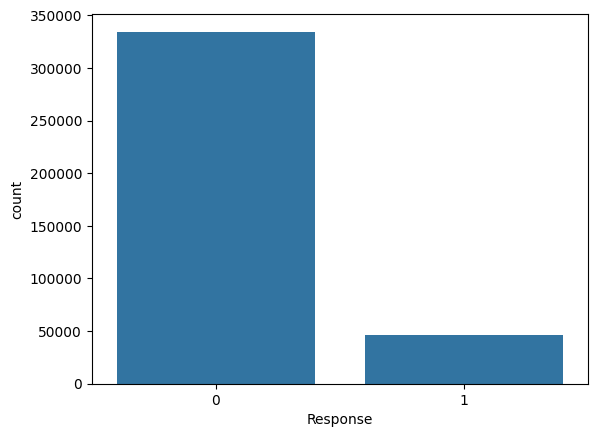

In [16]:
# Chart - 1 visualization code
sns.countplot(x= df['Response'],data=df)

##### 1. Why did you pick the specific chart?

I had to compare the value of responses so bar plot is the best choice.

##### 2. What is/are the insight(s) found from the chart?

The data is highly imbalanced. Maximum customers are not interested.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is a negative growth because we want maximum customers to be interested in having the insurace.

#### Chart - 2 plot of willing males and females

Text(0.5, 1.0, 'Difference in responses of males and females')

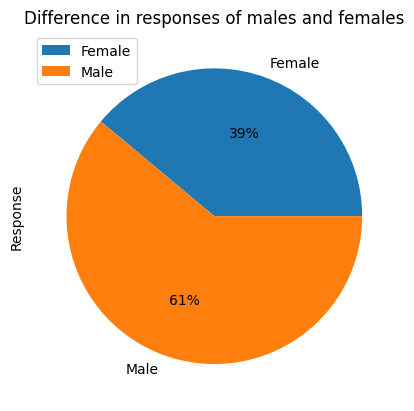

In [17]:
# Chart - 2 visualization code
df.groupby(['Gender']).sum().plot(
    kind='pie', y='Response', autopct='%1.0f%%')
plt.title("Difference in responses of males and females")

##### 1. Why did you pick the specific chart?

pie chart is best used to show the portions of the data.

##### 2. What is/are the insight(s) found from the chart?

This shows that 61% of males and 39% of females are interested in getting an insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Female customers should be made aware about the insurance policy to gain their interest with some offers and interests.

#### Chart - 3 Count of Male and Female AND Response in Male and female category

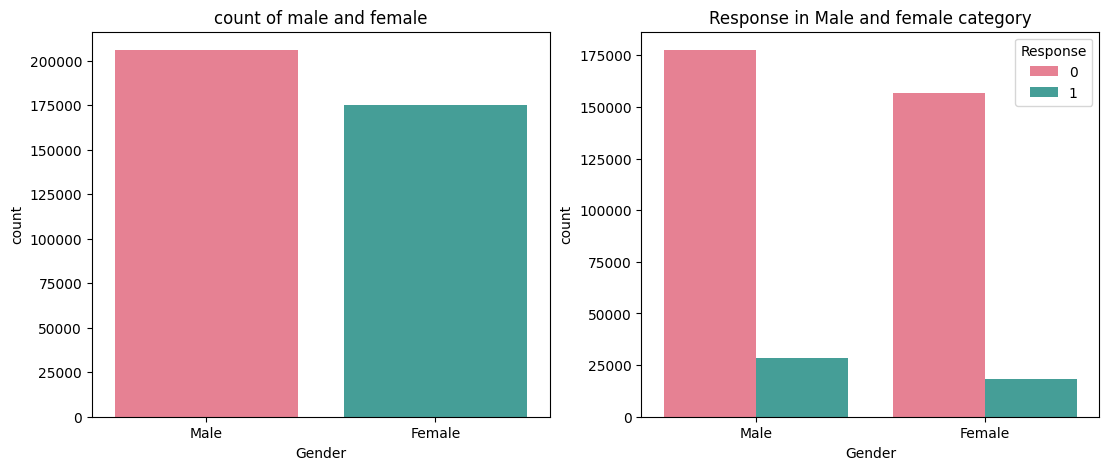

In [18]:
# Chart - 3 visualization code
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x= df['Gender'],palette='husl')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(x =df['Gender'], hue = df['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()

##### 1. Why did you pick the specific chart?

I had to compare the value of male and female AND their responses for yes or no so bar plot is the best choice.

##### 2. What is/are the insight(s) found from the chart?

The gender variable in the dataset is almost equally distributed. Male category is slightly greater than that of female and chances of buying the insurance is also little high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Female customers should be made aware about the insurance policy to gain their interest with some offers and interests.

#### Chart - 4 Plot of age vs response

Text(0.5, 1.0, 'Plot of age vs response')

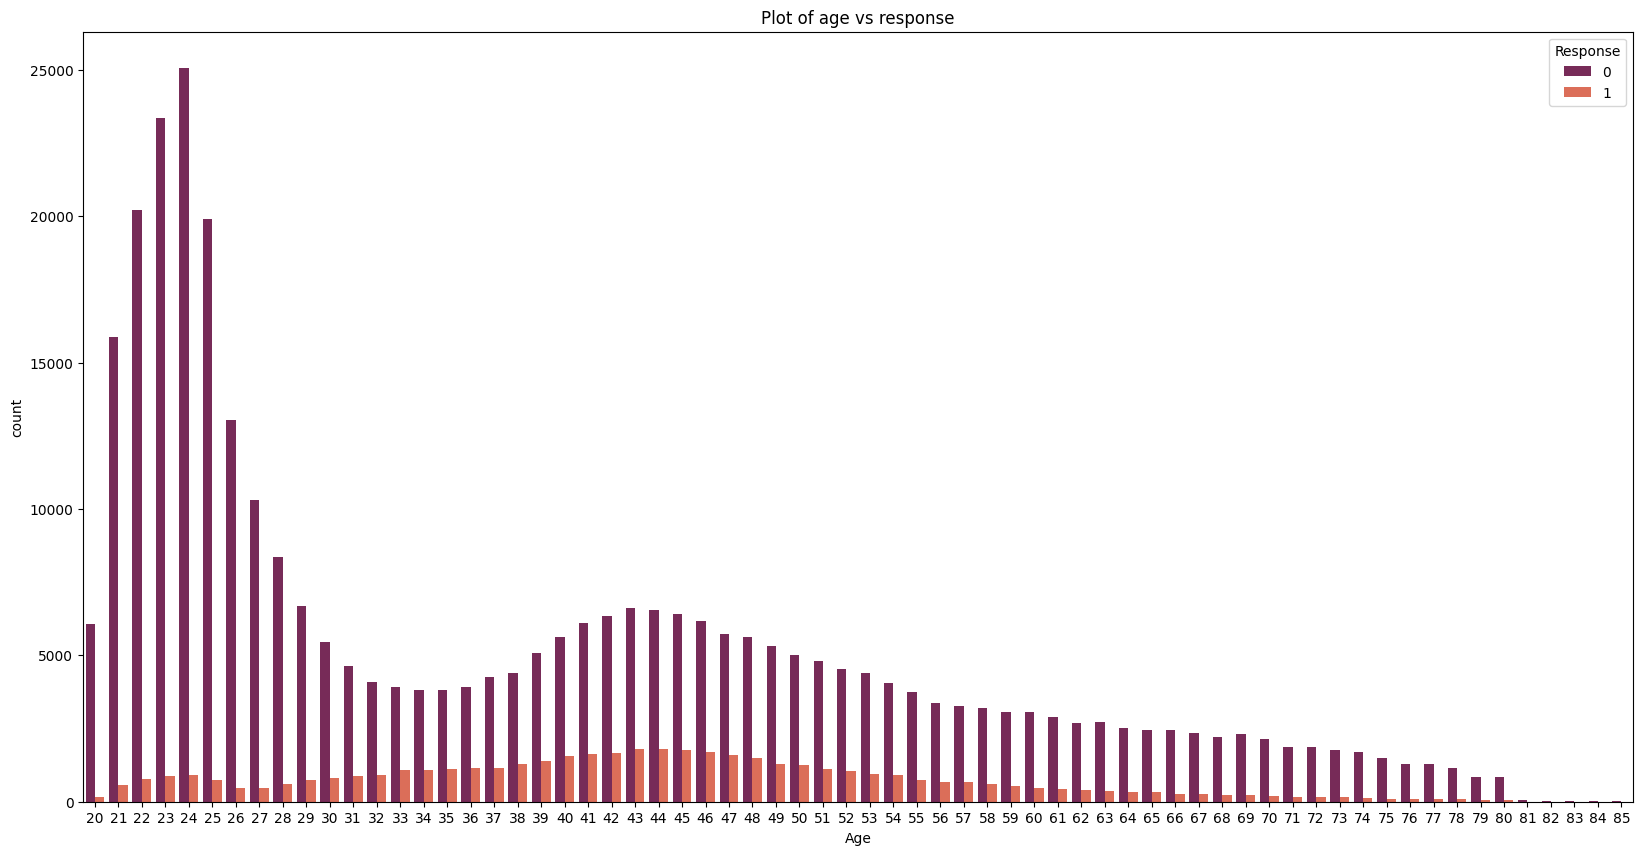

In [19]:
# Chart - 4 visualization code
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df, palette="rocket")
plt.title("Plot of age vs response")

##### 1. Why did you pick the specific chart?

Plot clearly stating positive and negative respones of different age groups.

##### 2. What is/are the insight(s) found from the chart?

Young people below 30 are not interested in vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.People aged between 30-60 are more likely to be interested.

#### Chart - 5 Preference of Previously insured people

Text(0.5, 1.0, 'Preference of Previously insured people')

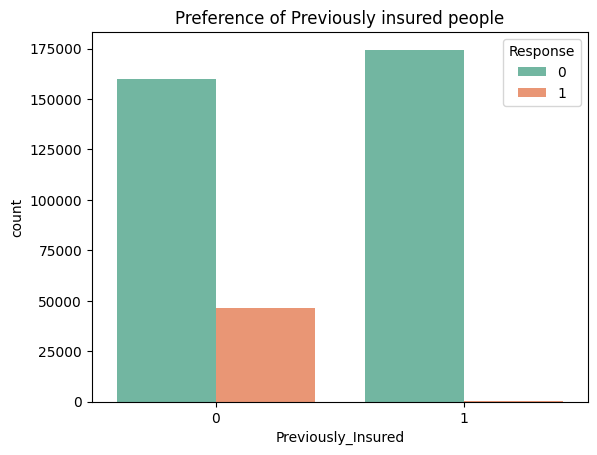

In [20]:
# Chart - 5 visualization code
sns.countplot(x = df['Previously_Insured'],hue='Response',data=df,palette='Set2')
plt.title("Preference of Previously insured people")

##### 1. Why did you pick the specific chart?

Values of Response of previously injured people have to be seen and box plot is best choice.

##### 2. What is/are the insight(s) found from the chart?

Customer who are not perviosly insured are likely to be inetrested.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People should be made aware how important having an insurance is if you meet an accident.

#### Chart - 6 Preference of people owing a driving license

Text(0.5, 1.0, 'Preference of people owing a driving license')

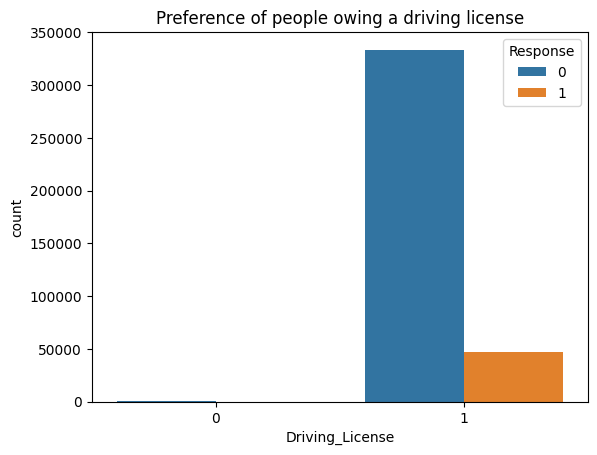

In [21]:
# Chart - 6 visualization code
sns.countplot(x= df['Driving_License'],hue=df['Response'])
plt.title("Preference of people owing a driving license")

##### 1. Why did you pick the specific chart?

Bar plot is used to show the response of people owing a driving license.

##### 2. What is/are the insight(s) found from the chart?

Customers who are interested in Vehicle Insurance almost all have driving license

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People should be made aware that the people with driving license must have health insurance but people without driving license should also have insurance.

#### Chart - 7 Responses of owners based on the life of their car

Text(0.5, 1.0, 'Responses of owners based on the life of their car')

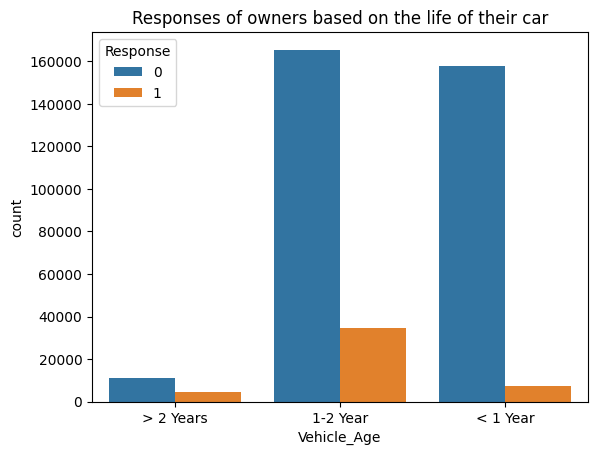

In [22]:
# Chart - 7 visualization code
sns.countplot(x='Vehicle_Age',hue='Response',data=df)
plt.title("Responses of owners based on the life of their car")

##### 1. Why did you pick the specific chart?

Bar plot is used to show the Responses of owners based on the life of their car.

##### 2. What is/are the insight(s) found from the chart?

Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The importance of having a insurance when buying a vehicle should be told to customers.

#### Chart - 8 Distribution of Annual premium

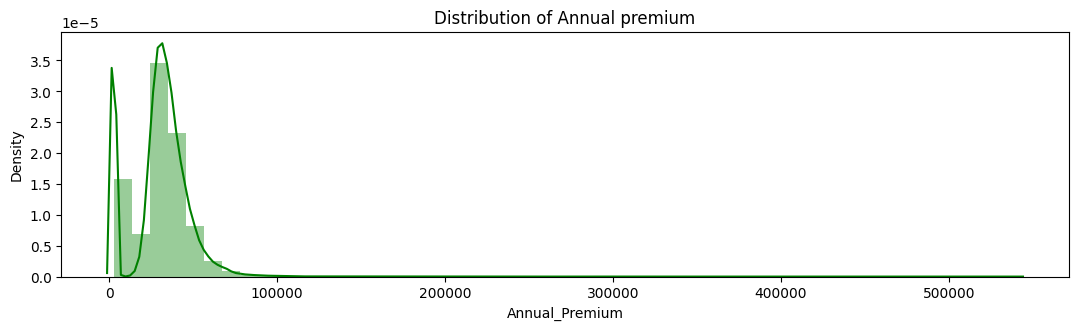

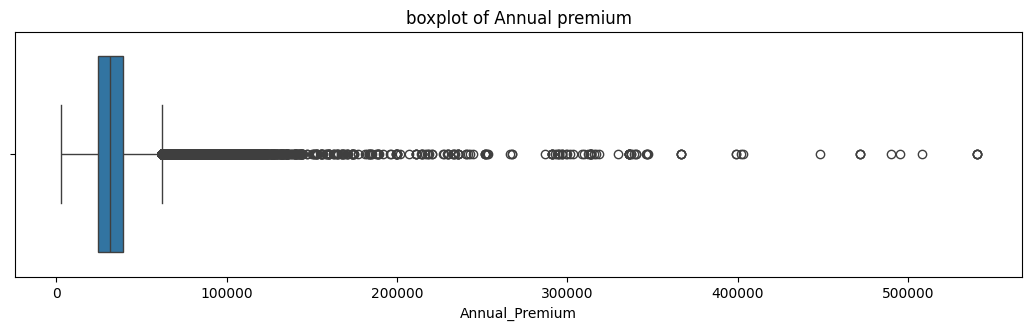

In [23]:
# Chart - 8 visualization code
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(x= df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

##### 1. Why did you pick the specific chart?

A distplot here depicts the variation in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

From the distribution plot we can infer that the annual premimum variable is right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the boxplot we can observe lot of outliers in the variable.

#### Chart - 9 - Correlation Heatmap

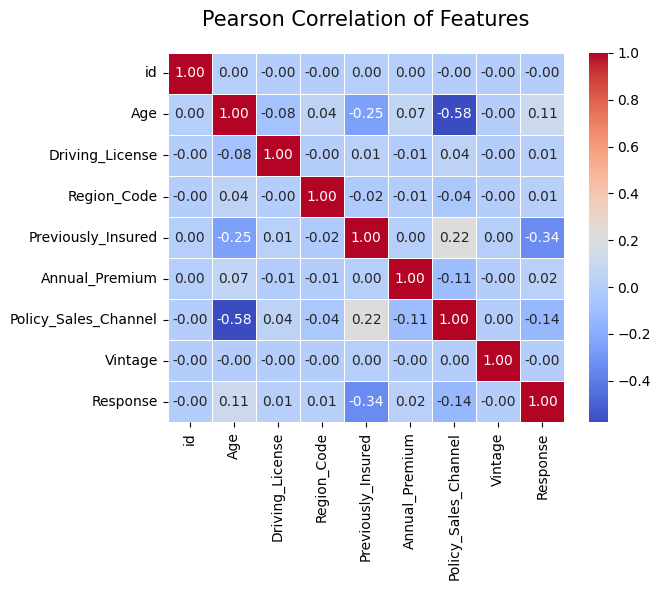

In [24]:
# Correlation Heatmap visualization code
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation of Features", y=1.05, size=15)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

Target variable is not much affected by Vintage variable. we can drop least correlated variable.

#### Chart - 10 - Pair Plot

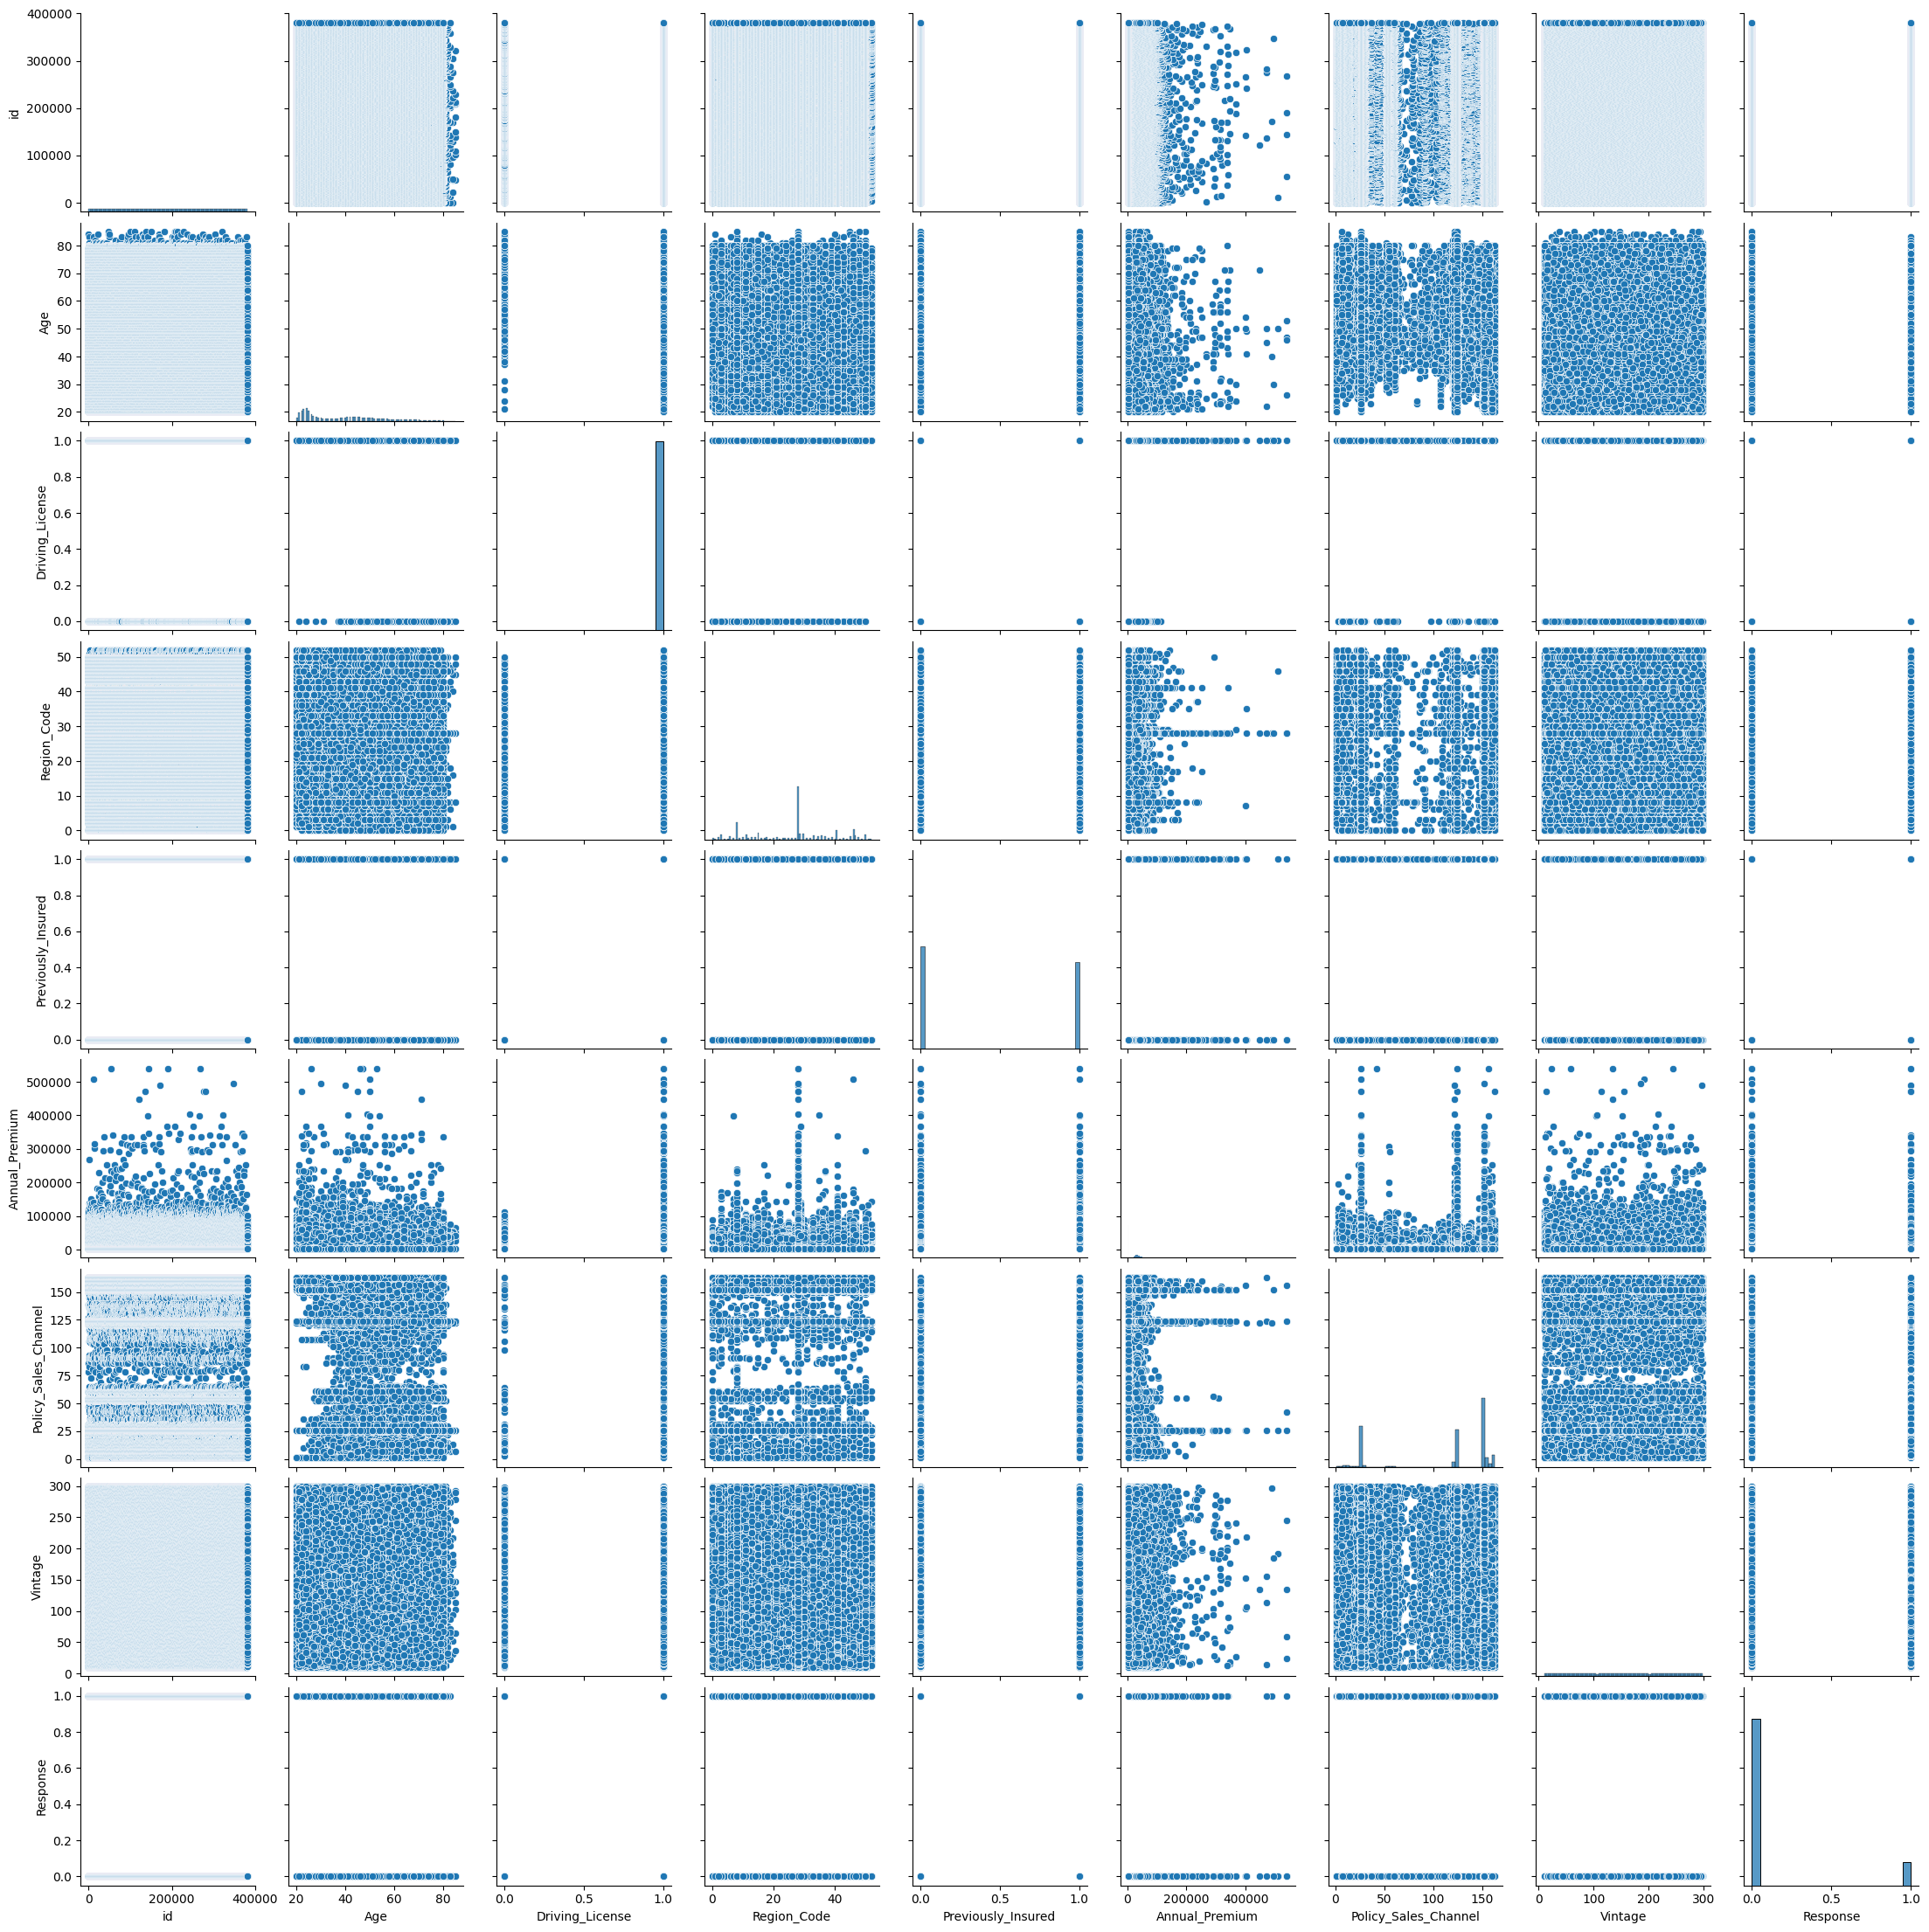

In [25]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables. We can see the realtionship between all the columns with each other in above chart.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [26]:
# Encode your categorical columns
#changing catagorical value to binary form(0 and 1) using labelEncoder
labelEncoder= LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = labelEncoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])

In [27]:
df.head()  #this is how it looks like after implementing labelEncoder

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


### 2. Feature Manipulation & Selection

#### 1. Data Splitting

Separating dependent and independent variable

In [28]:
# Split your data to train and test. Choose Splitting ratio wisely.
y=df['Response']      #dependent variable
X=df.drop(columns='Response')        #independent variable

#### 2. Feature Selection

[0.19326398 0.00563811 0.13987974 0.00047894 0.09396845 0.05768076
 0.01564266 0.0743447  0.16337379 0.06908445 0.18664442]


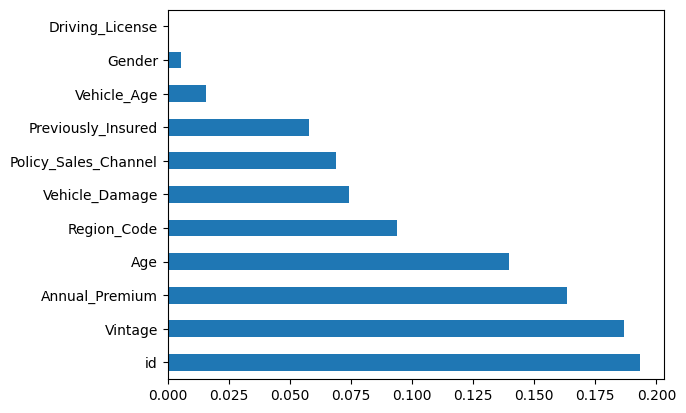

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based class
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [30]:
X=X.drop(['Driving_License'],axis=1) #dropping driving license as it has very less significance

### 3. Handling Class Imbalance

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


<Axes: xlabel='Response', ylabel='count'>

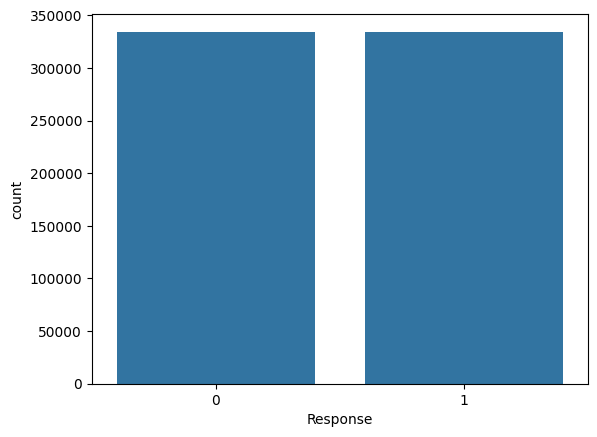

In [31]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(x= y_new)
#so random resampling made the data even and now the huge difference has been removed (using oversampling method)

### 4. Feature Scaling

In [32]:
# Scaling your data
X_train,X_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(468158, 10) (200640, 10) (468158,) (200640,)


## ***6. ML Model Implementation***

### Model Selection

# ML Model - 1. Logistic regression

In [33]:
reg=LogisticRegression()
reg=reg.fit(X_train,y_train)
pred=reg.predict(X_test)
lr_probability =reg.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7836024720893142
ROC_AUC Score: 0.8336324670855574


In [34]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61478
           1       0.98      0.70      0.82    139162

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



## ROC curve

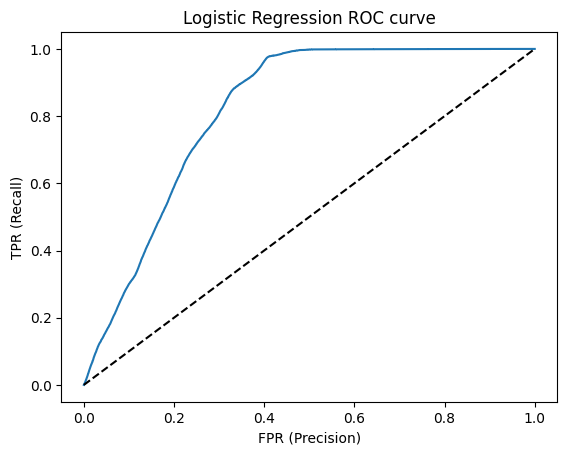

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Confusion Matrix

[[59194 41134]
 [ 2284 98028]]


<Axes: >

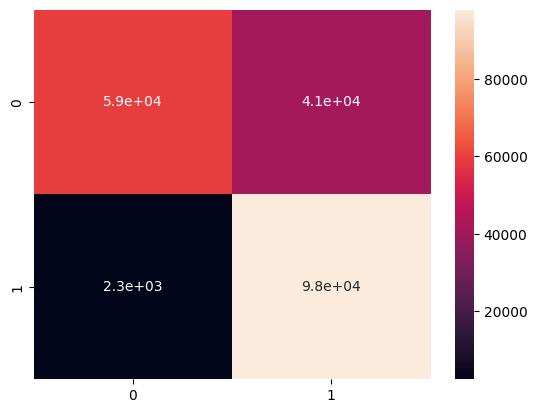

In [36]:
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)

# ML Model - 2. Random forest classifier

In [37]:
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
RF_probability = randomforest.predict_proba(X_test)[:,1]



AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print("Accuracy:",accuracy_score(y_pred,y_test))
print("ROC_AUC Score:",AUC_RF)

Accuracy: 0.9451555023923445
ROC_AUC Score: 0.9498966224398099


In [38]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     90026
           1       1.00      0.90      0.95    110614

    accuracy                           0.95    200640
   macro avg       0.95      0.95      0.95    200640
weighted avg       0.95      0.95      0.95    200640



## ROC curve

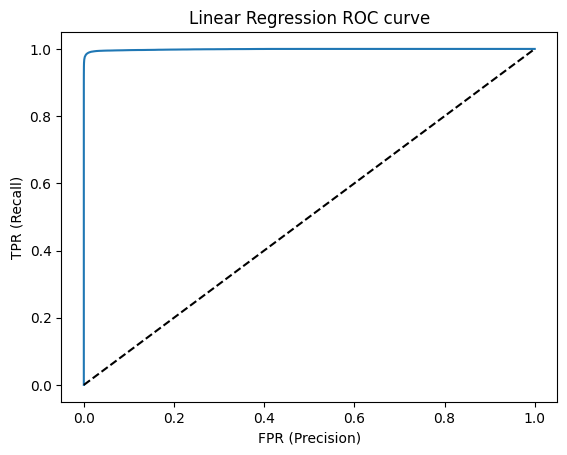

In [39]:
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Confusion Matrix

[[89675   351]
 [10653 99961]]


<Axes: >

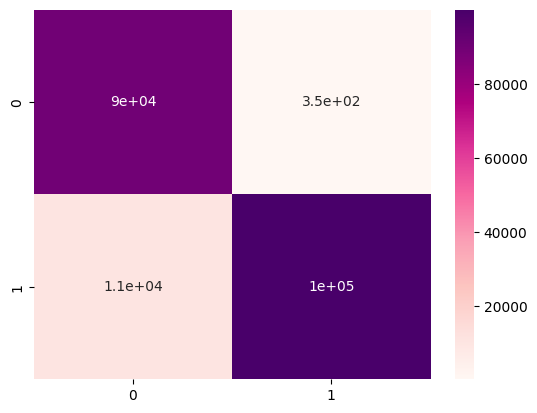

In [40]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

# ML Model - 3. XGB CLASSIFIER

In [41]:
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train, y_train)
y_predict = XGB_fit.predict(X_test)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print("Accuracy:",accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

Accuracy: 0.8138955342902712
ROC_AUC Score: 0.8352912974907621


In [42]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79     74984
           1       0.94      0.75      0.83    125656

    accuracy                           0.81    200640
   macro avg       0.81      0.84      0.81    200640
weighted avg       0.85      0.81      0.82    200640



## ROC curve

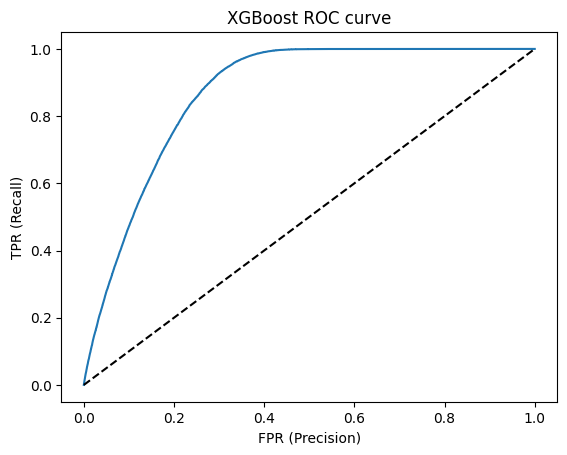

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Confusion Matrix

[[68986 31342]
 [ 5998 94314]]


<Axes: >

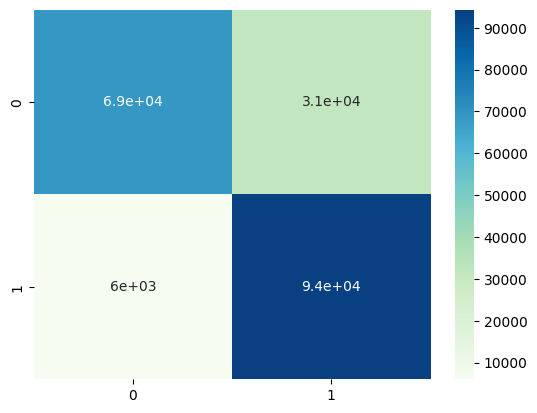

In [44]:
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

## COMPAIRING THE MODELS

Compairing all the models by writing all the results in one table

In [45]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783602,0.977231,0.704416,0.818694,0.833632
Randomforest,0.945156,0.996501,0.903692,0.947830,0.949897
XGBClassifier,0.813896,0.940207,0.750573,0.834755,0.835291


The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier. Random forest classifier is the best modeling technique as it has a accuracy of 94%.

# **Conclusion**

1. Most of the customers are unwilling for getting a vehicle insurance

2. More males are interested in getting insurance (61%) as compared to females(38%)

3. People of the group 30-50 are the most interested in getting a vehicle insurance

4. The customers who have vehicle with age guarantee for 1-2 years are most interested

5. Customers with driving license

6. Features like vintage, Annual_Premium, age are impacting the target variable the most.

7. Compairing the models on the basis of ROC curve, accuracy, precision, f1_score and recall the RandomForest is giving the best results.  

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***